<a href="https://colab.research.google.com/github/MarcoChartier/Projet-PFE/blob/main/Template_Projet_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet PFE
## Description
Se projet est une application batîe dans le but d'aider les charges de transformation numérique à évaluer le projet. 

## Configuration
Ce projet nessésite de connaitre le language de progammation. Des explemes de code serons disponible au besoin. 

In [ ]:
pip install numpy-financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Importation des modules complémentaires
# Module à importer pour la partie financière
import numpy_financial as npf # Module des formules financières
import numpy as np # Module pour utiliser des arrays
import random # Module des fonctions aléatoires
import pandas as pd # Module pour la gestion des tableaux de données
import matplotlib.pyplot as plt # Module pour dessiner des graphiques 
# Import seaborn
import seaborn as sns

# Analyse processus



Cette section prend en paramètre l'état actuel des opérations. Ces données permette le calcul du bénéfice tangible potentiel.

Veuillez entrer vos meilleurs estimations. Entrez 0 si vous ne disposez pas l'information.

In [ ]:

#@markdown Nombre d'opérations
OP_ITERATION = 200 #@param {type:"number"}
#@markdown Temps superflus actuel relatif au nouveau système
TIME_EXTRA = 5 #@param {type:"number"}
#@markdown Temps nécessaire pour la communication interne
COMM_TIME = 10 #@param {type:"number"}
#@markdown Taux d'erreur quotidien (%)
ERROR_RATIO = 5 #@param {type:"number"}
#@markdown Temps nécessaire à la correction d'erreur
ERROR_TIME = 15 #@param {type:"number"}
#@markdown Temps nécessaire pour effectuer la redondance (min)
REDO_TIME = 33 #@param {type:"number"}
#@markdown Taux de redondance quotidien de l'opération (%)
REDO_RATIO = 6 #@param {type:"number"}
#@markdown Salaire horaire moyen d'un opérateur
SALARY_HOURLY = 26 #@param {type:"number"}
#@markdown Nombre de jours ouvrable annuel
ANNUAL_DAY = 220 #@param {type:"number"}
#@markdown Horizon d'analyse de la valeur présente nette : minimum 1 ans

Period_decisiontree = 0 #@param {type:"number"}
#@markdown Prévision de ROI de votre organisation
annuity = 0.1 #@param {type:"number"}
#@markdown Facteur multiplicatif du nombre d'opération en augmentation
UPPER_VALUE = 1.5 #@param {type:"number"}
#@markdown Facteur multiplicatif du nombre d'opération neutre
SAME_VALUE = 1 #@param {type:"number"}
#@markdown Facteur multiplicatif du nombre d'opération en diminution
LOWER_VALUE = 0.5 #@param {type:"number"}
#@markdown Probabilité d'augmentation du nombre d'opération (cumulatif à 1)
UPPER_VALUE_p = 0.7 #@param {type:"number"}
#@markdown Probabilité de maintient du nombre d'opération (cumulatif à 1)
SAME_VALUE_p = 0.3 #@param {type:"number"}
#@markdown Probabilité de diminution du nombre d'opération (cumulatif à 1)
LOW_VALUE_p = 0.1 #@param {type:"number"}



nodeList = []
OP_ITERATION_incer = [ [UPPER_VALUE_p, UPPER_VALUE], [SAME_VALUE_p, SAME_VALUE_p], [LOW_VALUE_p, LOWER_VALUE]]

Cette section calcul les bénéfices tangibles potentiels actuels

In [ ]:
def benefice_tangible():

  global OP_ITERATION, TIME_EXTRA, COMM_TIME , ERROR_RATIO, ERROR_TIME, REDO_TIME, REDO_RATIO, SALARY_HOURLY, ANNUAL_DAY

  Timesaved = (OP_ITERATION*TIME_EXTRA)+COMM_TIME+(OP_ITERATION*ERROR_RATIO/100*ERROR_TIME)+(OP_ITERATION*REDO_TIME/100*REDO_RATIO)
  benef = Timesaved/60*SALARY_HOURLY*ANNUAL_DAY
  return benef

print("La valeur des bénéfices tangibles est de", round(benefice_tangible(),2)*(Period_decisiontree+1),"$")

La valeur des bénéfices tangibles est de 148338.67 $


Cette section calcul les bénéfices tangibles potentiels en valeur présente nette (VPN)

In [ ]:
def benef_main():

    #Calcul du gain en temps
    def benef_time(OP_ITERATION_calc):

        global TIME_EXTRA, COMM_TIME , ERROR_RATIO, ERROR_TIME, REDO_TIME, REDO_RATIO

        Timesaved = (OP_ITERATION_calc*TIME_EXTRA)+COMM_TIME+(OP_ITERATION_calc*ERROR_RATIO/100*ERROR_TIME)+(OP_ITERATION_calc*REDO_TIME/100*REDO_RATIO)

        return Timesaved
    
    #Calcul du bénéfice monétaire tangible
    def benef_financial(Timesaved):
        
        global SALARY_HOURLY, ANNUAL_DAY

        M = Timesaved/60*SALARY_HOURLY*ANNUAL_DAY
        
        return M

    #Consolidation du calcul de bénéfice monétaire
    def benef_calc(OP_ITERATION_dtc):

        #print(benef_financial (benef_time(OP_ITERATION_dtc)))
        benef_calc = benef_financial (benef_time(OP_ITERATION_dtc))
        return benef_calc
    
    #Définition de l'objet Node de l'arbre de décision
    class Node:
        def __init__(self, NewHead, NewOp, NewBenefit, NewPeriod, NewProb):
            self.head = NewHead

            self.op = NewOp
            self.benefit = NewBenefit
            self.period = NewPeriod
            self.prob = NewProb
            
            self.high = None
            self.mid = None
            self.low = None

            self.benefEsp = None

    #Logique de récursion de l'arbre de décision
    def create_nextNode(CurrentNode: Node):

        global nodeList

        high = False
        mid = False
        low = False
        currentPeriod = CurrentNode.period + 1

        CurrentNode.high = Node( CurrentNode, CurrentNode.op*OP_ITERATION_incer[0][1], benef_calc(CurrentNode.op*OP_ITERATION_incer[0][1]), currentPeriod, OP_ITERATION_incer[0][0] )

        for x in range(len(nodeList)):
            if nodeList[x][1] == currentPeriod and nodeList[x][2] == CurrentNode.high.op :
                high = 1
                CurrentNode.high = nodeList[x][0]
                break
            
        if high == 0:
            nodeList.append([CurrentNode.high, CurrentNode.high.period, CurrentNode.high.op])

        

        CurrentNode.mid = Node( CurrentNode, CurrentNode.op*OP_ITERATION_incer[1][1], benef_calc(CurrentNode.op*OP_ITERATION_incer[1][1]), currentPeriod, OP_ITERATION_incer[1][0] )
        for x in range(len(nodeList)):
            if nodeList[x][1] == currentPeriod and nodeList[x][2] == CurrentNode.mid.op :
                mid = 1
                CurrentNode.mid = nodeList[x][0]
                break
            
        if mid == 0:
            nodeList.append([CurrentNode.mid, CurrentNode.mid.period, CurrentNode.mid.op])
                

        CurrentNode.low = Node( CurrentNode, CurrentNode.op*OP_ITERATION_incer[2][1], benef_calc(CurrentNode.op*OP_ITERATION_incer[2][1]), currentPeriod, OP_ITERATION_incer[2][0] )

        for x in range(len(nodeList)):
            if nodeList[x][1] == currentPeriod and nodeList[x][2] == CurrentNode.low.op :
                mid = 1
                CurrentNode.low = nodeList[x][0]
                break
            
        if low == 0:
            nodeList.append([CurrentNode.low, CurrentNode.low.period, CurrentNode.low.op])
                
        
        if currentPeriod < Period_decisiontree:
            if high == 0:
                create_nextNode(CurrentNode.high)
            if mid == 0:
                create_nextNode(CurrentNode.mid)
            if low == 0:
                create_nextNode(CurrentNode.low)
        
        CurrentNode.benefEsp = (CurrentNode.high.benefit*CurrentNode.high.prob + CurrentNode.mid.benefit*CurrentNode.mid.prob + CurrentNode.low.benefit*CurrentNode.low.prob)/(1+annuity)
        CurrentNode.benefit = CurrentNode.benefEsp + CurrentNode.benefit

    #Création de l'arbre de décision par récursion
    def create_tree():

        global nodeList
        nodeList.clear
        
        firstNode = Node(None, OP_ITERATION, benef_calc(OP_ITERATION), 0, 1)
        nodeList.append([firstNode, firstNode.period, firstNode.op])
        create_nextNode(firstNode)
        firstNode.benefEsp = (firstNode.high.benefit*firstNode.high.prob + firstNode.mid.benefit*firstNode.mid.prob + firstNode.low.benefit*firstNode.low.prob)/(1+annuity)

        
        return firstNode.benefit

    return create_tree()

#Résultat VPN
print("La valeur actuelle nette (VPN) des bénéfices sur une période de", Period_decisiontree,"ans est", round(benef_main(), 2), "$")


        




La valeur actuelle nette (VPN) des bénéfices sur une période de 0 ans est 308736.13 $


# Analyse Projet

Cette section permet d'initialiser le projet afin de crée un premier diagrame PERT qui sera par la suite ajusté en fonction de votre réalité.

In [ ]:
#initialisation des variables
DureeAnalysePreliminaire = 20 
DureeExportation = 5 
DureeConversion = 10 
DureeComptabilite = 50 
DureeInventaire = 55 
DureeCrm = 75 
DureeLivraison = 35 
DureeEmployé = 40 
DureeMarketing = 25 
DureeImportation = 2 
DureeFormation = 20 
DureeTests = 20 

# [numéro de la tâche, prédécéseur, durée de la tâche, début au plus tôt, début au plus târd]
AnalysePreliminaire = [1,0,DureeAnalysePreliminaire,0,0]
Exportation = [2,1,DureeExportation,20,80]
Conversion = [3,2,DureeConversion,25,85]
Comptabilite = [4,3,DureeComptabilite,20,40]
Inventaire = [5,3,DureeInventaire,20,40]
Crm = [6,3,DureeCrm,20,20]
Livraison = [7,3,DureeLivraison,20,40]
Employé = [8,3,DureeEmployé,20,40]
Marketing = [9,3,DureeMarketing,20,70]

E2 = [Exportation[2],Comptabilite[2],Inventaire[2],Crm[2],Livraison[2],Employé[2],Marketing[2]]
E2.sort()
Ci=E2[-1]+DureeAnalysePreliminaire
Cf=Ci+DureeImportation
Ct=Cf+DureeFormation
Tf=Ct-DureeFormation
Ti=Tf-DureeImportation

AnalysePreliminaire = [1,0,DureeAnalysePreliminaire,0,0]
Exportation = [2,1,DureeExportation,DureeAnalysePreliminaire,Ci-DureeExportation]
Conversion = [3,2,DureeConversion,DureeAnalysePreliminaire+DureeConversion,Ci-DureeConversion]
Comptabilite = [4,3,DureeComptabilite,DureeAnalysePreliminaire,Ci-DureeComptabilite]
Inventaire = [5,3,DureeInventaire,DureeAnalysePreliminaire,Ci-DureeInventaire]
Crm = [6,3,DureeCrm,DureeAnalysePreliminaire,Ci-DureeCrm]
Livraison = [7,3,DureeLivraison,DureeAnalysePreliminaire,Ci-DureeLivraison]
Employé = [8,3,DureeEmployé,DureeAnalysePreliminaire,Ci-DureeEmployé]
Marketing = [9,3,DureeMarketing,DureeAnalysePreliminaire,Ci-DureeMarketing]
Importation = [10,10,DureeImportation,Ci,Ti]
Formation = [11,10,DureeFormation,Cf,Tf]
Tests = [12,11,DureeTests,Ct,Ct]

Cette section permet d'ajuster le temps de certaines tâches en fonction de votre réalité. Ainsi, le chemin critique sera ajusté de facons dynamique en fonction de vos réponses.

In [ ]:
#@markdown Quel est votre nombre d'employés :
NbEmploye = 500 #@param {type:"number"}
NbEmploye = int(NbEmploye)
#@markdown Quel est votre chiffre d'affaire moyen :
ChiffreAffaire = 80000000 #@param {type:"number"}
#@markdown Vos données actuelles sont t'elles facilement exportable en format CSV ?
QuestionExportation = "Oui" #@param ["Non", "Oui"]
#@markdown Utiliser vous les modules suivants :
ModuleComptabilité = "Oui" #@param ["Non", "Oui"]
ModuleInventaire = "Oui" #@param ["Non", "Oui"]
ModuleCRM = "Oui" #@param ["Non", "Oui"]
ModuleLivraison = "Oui" #@param ["Non", "Oui"]
ModuleEmployé = "Oui" #@param ["Non", "Oui"]
ModuleMarketing = "Non" #@param ["Non", "Oui"]


Cette section permet de recalculer le temps de chacune des tâches ainsi que le chemin critique.

In [ ]:
if NbEmploye >= 20 and NbEmploye < 100 :
  DureeCrm = DureeCrm  *1.05
  DureeEmployé = DureeEmployé  *1.10

if NbEmploye >= 100 and NbEmploye < 1500 :
  DureeCrm = DureeCrm *1.10
  DureeEmployé = DureeEmployé  *1.15

if NbEmploye >= 1500 :
  DureeCrm = DureeCrm *1.15
  DureeEmployé = DureeEmployé *1.20

if ChiffreAffaire >= 500000 and ChiffreAffaire < 1000000 :
  DureeAnalysePreliminaire = DureeAnalysePreliminaire  *1.20
  DureeComptabilite = DureeComptabilite  *1.20
  DureeInventaire = DureeInventaire  *1.20
  DureeLivraison = DureeLivraison  *1.20
  DureeMarketing = DureeMarketing *1.20

if ChiffreAffaire >= 1000000 and ChiffreAffaire < 5000000 :
  DureeAnalysePreliminaire = DureeAnalysePreliminaire  *1.60
  DureeComptabilite = DureeComptabilite  *1.60
  DureeInventaire = DureeInventaire  *1.60
  DureeLivraison = DureeLivraison  *1.60
  DureeMarketing = DureeMarketing *1.60

if ChiffreAffaire >= 5000000 :
  DureeAnalysePreliminaire = DureeAnalysePreliminaire  *2
  DureeComptabilite = DureeComptabilite  *2
  DureeInventaire = DureeInventaire  *2
  DureeLivraison = DureeLivraison  *2
  DureeMarketing = DureeMarketing *2

if QuestionExportation == 'Non' :
  DureeConversion = DureeConversion*3

if ModuleComptabilité == 'Non' :
  DureeComptabilite = 0

if ModuleInventaire == 'Non' :
  DureeInventaire = 0

if ModuleCRM == 'Non' :
  DureeCrm = 0

if ModuleLivraison == 'Non' :
  DureeLivraison = 0

if ModuleEmployé == 'Non' :
  DureeEmployé = 0

if ModuleMarketing == 'Non' :
  DureeMarketing = 0

AnalysePreliminaire = [1,0,DureeAnalysePreliminaire,0,0]
Exportation = [2,1,DureeExportation,20,80]
Conversion = [3,2,DureeConversion,25,85]
Comptabilite = [4,3,DureeComptabilite,20,40]
Inventaire = [5,3,DureeInventaire,20,40]
Crm = [6,3,DureeCrm,20,20]
Livraison = [7,3,DureeLivraison,20,40]
Employé = [8,3,DureeEmployé,20,40]
Marketing = [9,3,DureeMarketing,20,70]

E2 = [Exportation[2],Comptabilite[2],Inventaire[2],Crm[2],Livraison[2],Employé[2],Marketing[2]]
E2.sort()
Ci=E2[-1]+DureeAnalysePreliminaire
Cf=Ci+DureeImportation
Ct=Cf+DureeFormation
Tf=Ct-DureeFormation
Ti=Tf-DureeImportation

AnalysePreliminaire = [1,0,DureeAnalysePreliminaire,0,0]
Exportation = [2,1,DureeExportation,DureeAnalysePreliminaire,Ci-DureeExportation]
Conversion = [3,2,DureeConversion,DureeAnalysePreliminaire+DureeConversion,Ci-DureeConversion]
Comptabilite = [4,3,DureeComptabilite,DureeAnalysePreliminaire,Ci-DureeComptabilite]
Inventaire = [5,3,DureeInventaire,DureeAnalysePreliminaire,Ci-DureeInventaire]
Crm = [6,3,DureeCrm,DureeAnalysePreliminaire,Ci-DureeCrm]
Livraison = [7,3,DureeLivraison,DureeAnalysePreliminaire,Ci-DureeLivraison]
Employé = [8,3,DureeEmployé,DureeAnalysePreliminaire,Ci-DureeEmployé]
Marketing = [9,3,DureeMarketing,DureeAnalysePreliminaire,Ci-DureeMarketing]
Importation = [10,10,DureeImportation,Ci,Ti]
Formation = [11,10,DureeFormation,Cf,Tf]
Tests = [12,11,DureeTests,Ct,Ct]
CoutImplementation = 10000

Cette section présente les résultat de la simulation.

On y retrouve :

*   Chemin critique
*   Temps au plus court du projet
*   Temps global







In [ ]:
if Comptabilite[3] - Comptabilite[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, Comptabilité, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeComptabilite + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")

if Inventaire[3] - Inventaire[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, Inventaire, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeInventaire + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")

if Crm[3] - Crm[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, CRM, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeCrm + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")

if Livraison[3] - Livraison[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, Livraison, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeLivraison + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")

if Employé[3] - Employé[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, Employé, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeEmployé + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")

if Marketing[3] - Marketing[4] == 0 :
  CoutImplementation = (DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests)*150
  print("Le chemin critique est : [Analyse préliminaire, Marketing, importation des données, formation, Test] d'une durée continue de", round(DureeAnalysePreliminaire + DureeMarketing + DureeImportation + DureeFormation + DureeTests,2), "heures.")
  print("L'implantation à une durée total de ", DureeExportation+DureeConversion+DureeComptabilite+DureeInventaire+DureeCrm+DureeLivraison+DureeEmployé+DureeMarketing+DureeImportation+DureeFormation+DureeTests, "heures")


Le chemin critique est : [Analyse préliminaire, Inventaire, importation des données, formation, Test] d'une durée continue de 192 heures.
L'implantation à une durée total de  465.5 heures


# Partie d'analyse de l'investissement

## Hypotèse de travail


Cette section comprend les hypothèse de départ de votre projet d'investissement. 

- Le nombre d'année du projet peut varier entre 5 et 20 ans
- Le p_inves représente le motant investit pour lancer le projet.
- nb_licences représente le nombre d'usager qui auront besoins d'une licences
- c-licences représente le cout d'une licences moyenenne
- p_econo représente les économies espérer de la solution technologie compte réaliser
- c_fixe représente le cout fixe du projet
- c_variable représente les cout variable du projet

In [ ]:
#@markdown Info général
year = 10 #@param {type:"slider", min:5, max:20, step:1} 
p_inves = CoutImplementation

#@markdown Partie revenu
p_revenu = 0 #@param {type:"number"}
p_econo = 200000 #@param {type:"number"}

#@markdown Partie coût
nb_licences = 500 #@param {type:"number"}
c_licences = 300 #@param {type:"number"}
c_fixe = 0 #@param {type:"number"}
c_variable = 0 #@param {type:"number"}

if nb_licences > NbEmploye :
  print("Vous avez sélectionner un nombre de licences supérieux à votre nombre d'employer")

## Choix des variables aléatoires

Distribution triangle
- Low = valeur minimal de la distribution
- High = Valeur maximal de la distribution
- Mode = Valeur moyenne de la distribution 

Distribution uniforme
- uniformmin = valeur minimal de la distribution
- uniformmax = valeur maximal de la distribution

Distribution pondérer
- Choice = à la valeur multiplicative 
- pchoice = a la probabilité du choix

In [ ]:
from numpy.random.mtrand import choice
#@markdown Distribution triangle
low = 1 #@param {type:"slider", min:1, max:2, step:0.01} 
high = 1.03 #@param {type:"slider", min:1, max:2, step:0.01} 
mode = 1.01 #@param {type:"slider", min:1, max:2, step:0.01} 
#@markdown Distribution pondérer
choice1 = 1 #@param {type:"slider", min:1, max:2, step:0.01} 
choice2 = 1.1 #@param {type:"slider", min:1, max:2.5, step:0.01} 
choice3 = 1.2 #@param {type:"slider", min:1, max:3, step:0.01} 
pchoice1 = 0.34 #@param {type:"slider", min:0, max:1, step:0.01} 
pchoice2 = 0.33 #@param {type:"slider", min:0, max:1, step:0.01} 
pchoice3 = 0.33 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown Distribution uniforme
uniformmin = 10000 #@param {type:"number"}
uniformmax = 15000 #@param {type:"number"}
if (pchoice1 + pchoice2+pchoice3 != 1) :
  print('La somme des valeurs pchoice1 pchoice2 et pchoice 3 doit être égale à 1')

In [ ]:
# Initialisation des tableaux
tab_inves = np.array([CoutImplementation])
tab_econo = np.array([])
tab_c_fixe = np.array([])
tab_c_variable = np.array([])
table_c_licences = np.array([])

for i in range(year) :
  tab_inves = np.append(tab_inves,0)

for i in range(year+1) :
  if i == 0 :
    tab_c_fixe = np.append(tab_c_fixe,0)
  elif i == 1 :
    tab_c_fixe = np.append(tab_c_fixe,c_fixe)
  else :
    tab_c_fixe = np.append(tab_c_fixe,tab_c_fixe[i-1]*(np.random.choice([choice1,choice2,choice3],p=[pchoice1,pchoice2,pchoice3])))


for i in range(year+1) :
  if i == 0 :
    table_c_licences = np.append(table_c_licences,0)
  elif i == 1 :
    table_c_licences = np.append(table_c_licences,c_licences*nb_licences)
  else :
    table_c_licences = np.append(table_c_licences,table_c_licences[i-1]*(random.triangular(low,high,mode)))

for i in range(year+1) :
  if i == 0 :
    tab_econo = np.append(tab_econo,0)
  elif i ==1 :
    tab_econo = np.append(tab_econo,p_econo)
  else :
    tab_econo = np.append(tab_econo,random.uniform(uniformmin,uniformmax))

er = pd.DataFrame(columns=["Revenu",'Économie', 'Cout variable', 'Cout fixe', "Investissement","Total cout", "Total"], dtype='float')
er["Économie"] = tab_econo
er["Cout variable"] = table_c_licences
er["Cout fixe"] = tab_c_fixe
er["Investissement"] = tab_inves
er["Total cout"] = er["Cout variable"] + er["Cout fixe"] + tab_inves
er["Total"] = tab_econo - er["Total cout"]
er = er.round(0)
er.transpose()

,0,1,2,3,4,5,6,7,8,9,10
Revenu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Économie,0.0,200000.0,12926.0,11436.0,11465.0,10210.0,10630.0,12989.0,14106.0,14921.0,10632.0
Cout variable,0.0,150000.0,152344.0,155551.0,159969.0,161373.0,163163.0,164922.0,166241.0,168177.0,169082.0
Cout fixe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Investissement,69825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total cout,69825.0,150000.0,152344.0,155551.0,159969.0,161373.0,163163.0,164922.0,166241.0,168177.0,169082.0
Total,-69825.0,50000.0,-139418.0,-144114.0,-148504.0,-151163.0,-152533.0,-151933.0,-152134.0,-153256.0,-158451.0


## Graphique cumulatif

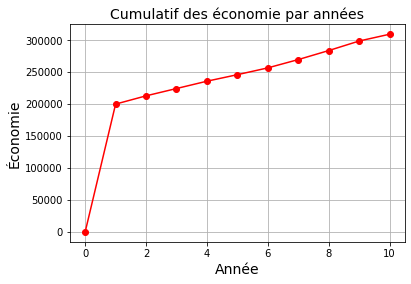

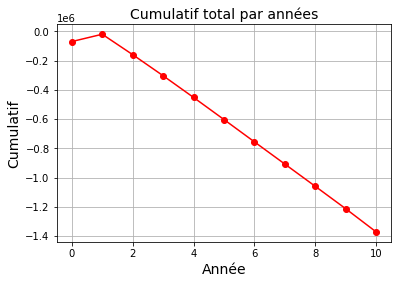

In [ ]:
# Graphique des économies
plt.plot(er.index, er["Économie"].cumsum(), color='red', marker='o',)
plt.title('Cumulatif des économie par années', fontsize=14)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Économie', fontsize=14)
#plt.ylim(-p_inves*1.5,p_inves*2)
plt.grid(True)
plt.show()

#Graphique du total
plt.plot(er.index, er["Total"].cumsum(), color='red', marker='o',)
plt.title('Cumulatif total par années', fontsize=14)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Cumulatif', fontsize=14)
plt.grid(True)
plt.show()

# interprétation des résultats

## Fonction utiliser pour la partie simulation

Le code doit être identique à la partie de génération de l'état des résultats du projet à un détail prêt. Ne pas changer la première et la dernier ligne. Il sont utiliser pour appler la fonction et en retirer la résultat. 

In [ ]:
def tableau() :
# Initialisation des tableaux
  tab_inves = np.array([p_inves])
  tab_econo = np.array([])
  tab_c_fixe = np.array([])
  tab_c_variable = np.array([])
  table_c_licences = np.array([])

  for i in range(year) :
    tab_inves = np.append(tab_inves,0)

  for i in range(year+1) :
    if i == 0 :
      tab_c_fixe = np.append(tab_c_fixe,0)
    elif i == 1 :
      tab_c_fixe = np.append(tab_c_fixe,c_fixe)
    else :
      tab_c_fixe = np.append(tab_c_fixe,tab_c_fixe[i-1]*(np.random.choice([1,1.5,2],p=[0.6,0.25,0.15])))


  for i in range(year+1) :
    if i == 0 :
      tab_c_variable = np.append(tab_c_variable,0)
    elif i == 1 :
      tab_c_variable = np.append(tab_c_variable,c_variable*nb_licences)
    else :
      tab_c_variable = np.append(tab_c_variable,tab_c_variable[i-1]*(random.triangular(low,high,mode)/10))

  for i in range(year+1) :
    if i == 0 :
      tab_econo = np.append(tab_econo,0)
    elif i ==1 :
      tab_econo = np.append(tab_econo,p_econo)
    else :
      tab_econo = np.append(tab_econo,random.uniform(p_econo,p_econo*2))

  er = pd.DataFrame(columns=['Économie', 'Cout variable', 'Cout fixe', "Investissement","Total cout", "Total"], dtype='float')
  er["Économie"] = tab_econo
  er["Cout variable"] = tab_c_variable
  er["Cout fixe"] = tab_c_fixe
  er["Investissement"] = tab_inves
  er["Total cout"] = tab_c_variable + tab_c_fixe + tab_inves
  er["Total"] = tab_econo - er["Total cout"]
  
  return er["Total"]

## Analyse des résultat de la partie investissement



Sélectionner votre taux de rendement désirer pour le projet (TRAM)

Sélectionner le nombre de simulation que vous souhaiter effectuer (SIM)

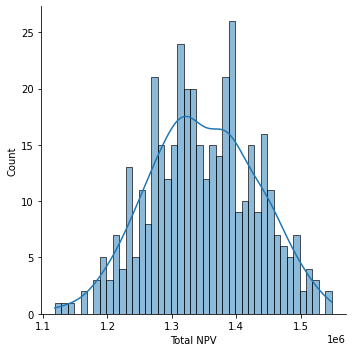

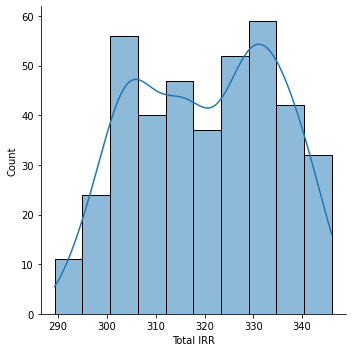

In [ ]:
#@markdown Info simulation
tab_npv = np.array([])
tab_irr = np.array([])
TRAM = 0.15 #@param {type:"slider", min:0, max:0.3, step:0.01} 
SIM = 400 #@param {type:"slider", min:10, max:1000, step:10} 

for i in range(SIM) :
  tab_npv = np.append(tab_npv,npf.npv(TRAM,tableau()))
  tab_irr = np.append(tab_irr,npf.irr(tableau())*100)

NPV = pd.DataFrame(data={'Total NPV': tab_npv})
IRR = pd.DataFrame(data={'Total IRR': tab_irr})
IRR = IRR.round(2)
NPV = NPV.round(0)

# Show plot
sns.displot(NPV, x="Total NPV",  kde=True, binwidth=10000 )
sns.displot(IRR, x="Total IRR",  kde=True)

In [ ]:
NPV.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total NPV,400.0,1.348054e+06,82021.817195,1118198.0,1288388.5,1345530.5,1403536.0,1548045.0


In [ ]:
IRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total IRR,400.0,320.285375,14.305712,289.28,307.255,320.405,332.55,346.09


Résultat de l'analyse de la valeur acutel net (NPV)
- La valuer au 75ieme percentile est négatif
- Le projet n'est pas rentable dans l'état proposer
- L'entreprise doit augmenter les économies espérer

Résultat de l'analyse du taux de retour interne (IRR)
- La moyenne est autour de 7%
- Le projet ne respecte pas notre structure de cout pour ce projet
- Avec un écart type de 6%
- Le projet à trop de variabilité pour considérer la recherche de cout de financement moins cher
- L'entreprise doit mieux controlé l'évolution des couts

# Fin de l'analyse